In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [52]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_22704\2249596087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

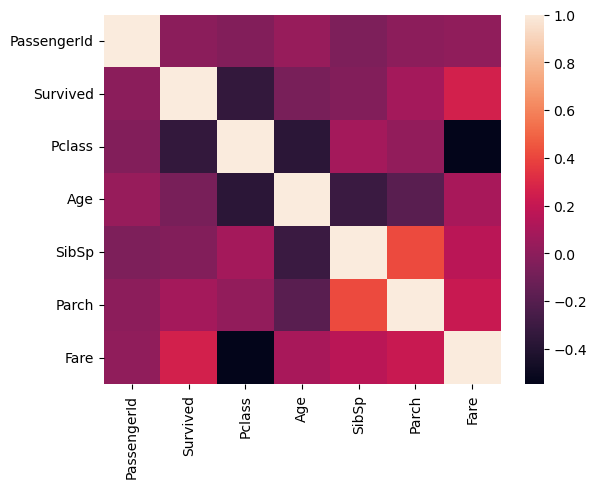

In [5]:
import seaborn as sns
sns.heatmap(df.corr())

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_name = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_name = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
    
        return X

class FeatureDrop(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1)

from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureEncoder",FeatureEncoder()),
                     ("featuredrop",FeatureDrop())])

In [53]:
df = pipeline.fit_transform(df)

In [8]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [16]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
def fit_score(models,X_train,y_train,X_test,y_test):
    np.random.seed(1)
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [54]:
X = df.drop("Survived",axis = 1)
y = df.Survived
# X = X.drop("PassengerId",axis = 1)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)

In [55]:
model_scores = fit_score(models = models,
                         X_train = X_train,
                         y_train = y_train,
                         X_test = X_val,
                         y_test = y_val)

C:\Users\DELL\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
model_scores

{'Logistic Regression': 0.7932960893854749,
 'KNN': 0.6256983240223464,
 'Random Forest': 0.8100558659217877}

In [57]:
model_char = pd.DataFrame(model_scores,index = ["accuracy"])
model_char

,Logistic Regression,KNN,Random Forest
accuracy,0.793296,0.625698,0.810056


(array([0]), [Text(0, 0, 'accuracy')])

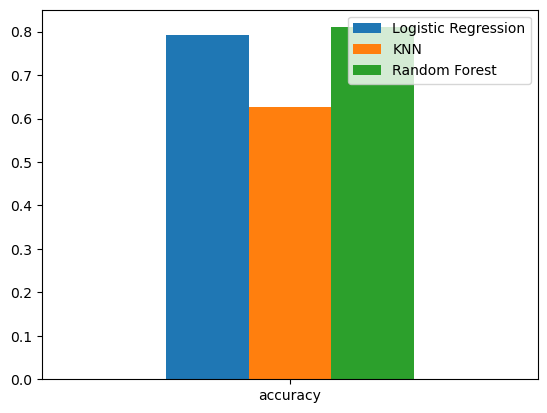

In [58]:
model_char.plot(kind = "bar")
plt.legend()
plt.xticks(rotation=0)

In [59]:
train_scores = []
test_score = []

k_range = range(1,21)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_val,y_val))
train_scores,test_score

([1.0,
  0.7907303370786517,
  0.797752808988764,
  0.7387640449438202,
  0.7528089887640449,
  0.7176966292134831,
  0.7148876404494382,
  0.7120786516853933,
  0.7078651685393258,
  0.6938202247191011,
  0.6966292134831461,
  0.6853932584269663,
  0.6896067415730337,
  0.6966292134831461,
  0.6839887640449438,
  0.6966292134831461,
  0.6910112359550562,
  0.6896067415730337,
  0.6853932584269663,
  0.6853932584269663],
 [0.6145251396648045,
  0.6256983240223464,
  0.6368715083798883,
  0.6145251396648045,
  0.6256983240223464,
  0.6256983240223464,
  0.6089385474860335,
  0.6256983240223464,
  0.6145251396648045,
  0.6201117318435754,
  0.6033519553072626,
  0.6312849162011173,
  0.6312849162011173,
  0.6536312849162011,
  0.6312849162011173,
  0.659217877094972,
  0.6536312849162011,
  0.6480446927374302,
  0.6480446927374302,
  0.664804469273743])

Max score in test: 66.48%
Max socre in train: 100.00%


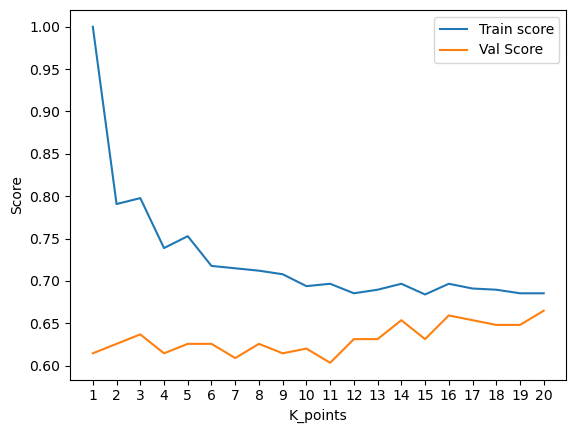

In [60]:
plt.plot(k_range,train_scores,label="Train score")
plt.plot(k_range,test_score,label="Val Score")
plt.xlabel("K_points")
plt.ylabel("Score")
plt.xticks(range(1,21,1))
plt.legend();
print(f"Max score in test: {max(test_score)*100:.2f}%")
print(f"Max socre in train: {max(train_scores)*100:.2f}%")

Max score in test: 68.16%


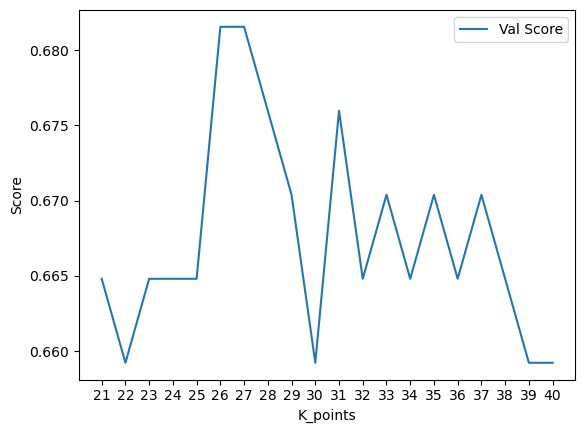

In [61]:
test_score = []

k_range = range(21,41)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score.append(knn.score(X_val,y_val))
plt.plot(k_range,test_score,label="Val Score")
plt.xlabel("K_points")
plt.ylabel("Score")
plt.xticks(range(21,41,1))
plt.legend();
print(f"Max score in test: {max(test_score)*100:.2f}%")

In [47]:
df[(df.Age > 60) & (df.Survived == 1)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
275,276,1,1,63.0,1,0,77.9583,0.0,0.0,1.0,1.0,0.0
483,484,1,3,63.0,0,0,9.5875,0.0,0.0,1.0,1.0,0.0
570,571,1,2,62.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
630,631,1,1,80.0,0,0,30.0000,0.0,0.0,1.0,0.0,1.0
829,830,1,1,62.0,0,0,80.0000,0.0,0.0,0.0,1.0,0.0


In [65]:
model_KNN = KNeighborsClassifier(n_neighbors=26)
model_KNN.fit(X_train,y_train)
model_KNN.score(X_val,y_val)

0.6815642458100558

In [67]:
lg_grid = {"C":np.logspace(-4,4,20),
            "solver":["liblinear"]}

rf_gird = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [72]:
np.random.seed(1)
from sklearn.model_selection import RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=lg_grid,
                                cv = 5,
                                n_iter=20, 
                                verbose=True)
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [73]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [74]:
rs_log_reg.score(X_val,y_val)

0.8044692737430168

In [75]:
np.random.seed(1)
rf_log_reg = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions = rf_gird,
                                cv = 5,
                                n_iter=20,
                                verbose=True)
rf_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [76]:
rf_log_reg.score(X_val,y_val)

0.7932960893854749

In [77]:
rf_log_reg.best_params_

{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': None}

In [78]:
reg_grid = {"C":np.logspace(-4,4,40),
            "solver":["liblinear"]}
np.random.seed(1)

rs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=reg_grid,
                                cv = 5,
                                verbose=True)

rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [79]:
rs_log_reg.score(X_val,y_val)

0.8044692737430168

In [80]:
rs_log_reg.best_params_

{'C': 2.030917620904735, 'solver': 'liblinear'}

In [82]:
model_log = LogisticRegression(C = 2.030917620904735,
                               solver= 'liblinear')

In [81]:
rf_gird = {"n_estimators":[50,100],
           "max_depth":[None,3,5,10],
           "min_samples_split":[4,8],
           "min_samples_leaf":[4,8]}
np.random.seed(1)
# Setup random hyperparameter search for LogisticRegression 
rf_reg = GridSearchCV(estimator = RandomForestClassifier(),
                                param_grid=  rf_gird,
                                cv = 5,
                                verbose=True)
rf_reg.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [4, 8],
                         'min_samples_split': [4, 8],
                         'n_estimators': [50, 100]},
             verbose=True)

In [88]:
rf_reg.score(X_val,y_val)

0.8044692737430168

In [89]:
rf_reg.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 50}

In [84]:
from sklearn.model_selection import cross_val_score

**Precision = True Positive / (True Positive + False Positive)**

**Recall = True Positive / (True Positive + False Negative)**

**F1_score = 2 * (precision * recall) / (precision + recall)**

In [85]:
model_log = LogisticRegression(C = 2.030917620904735,
                               solver= 'liblinear')
the_best_acc = cross_val_score(model_log,
                               X,
                               y,
                               cv=5,
                               scoring="accuracy")
the_best_acc = np.mean(the_best_acc)

the_best_pre = cross_val_score(model_log,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
the_best_pre = np.mean(the_best_pre)

the_best_recall = cross_val_score(model_log,
                               X,
                               y,
                               cv=5,
                               scoring="recall")
the_best_recall = np.mean(the_best_recall)

the_best_f1 = cross_val_score(model_log,
                               X,
                               y,
                               cv=5,
                               scoring="f1")
the_best_f1 = np.mean(the_best_f1)

data = pd.DataFrame({"Accuracy":the_best_acc,
                     "Precision":the_best_pre,
                     "Recall":the_best_recall,
                     "F1_score":the_best_f1},
                    index=[0])

In [86]:
data

,Accuracy,Precision,Recall,F1_score
0,0.786755,0.736623,0.692882,0.713347


In [90]:
model_rf = RandomForestClassifier(max_depth = 10,
                                   min_samples_leaf = 4,
                                   min_samples_split = 4,
                                   n_estimators = 50)
the_best_acc = cross_val_score(model_rf,
                               X,
                               y,
                               cv=5,
                               scoring="accuracy")
the_best_acc = np.mean(the_best_acc)

the_best_pre = cross_val_score(model_rf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
the_best_pre = np.mean(the_best_pre)

the_best_recall = cross_val_score(model_rf,
                               X,
                               y,
                               cv=5,
                               scoring="recall")
the_best_recall = np.mean(the_best_recall)

the_best_f1 = cross_val_score(model_rf,
                               X,
                               y,
                               cv=5,
                               scoring="f1")
the_best_f1 = np.mean(the_best_f1)

data = pd.DataFrame({"Accuracy":the_best_acc,
                     "Precision":the_best_pre,
                     "Recall":the_best_recall,
                     "F1_score":the_best_f1},
                    index=[0])

In [91]:
data

,Accuracy,Precision,Recall,F1_score
0,0.814826,0.839275,0.666752,0.735126


In [92]:
model_KNN.fit(X,y)
model_log.fit(X,y)
model_rf.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=50)